# Homework I

### **IMPORTANT NOTICE:** COMMENTS ARE BRIEF. FULL EXPLANATION IS AVAILABLE IN THE REPORT.

In [ ]:
# import useful libraries

import numpy as np
import networkx as nx
import scipy.io
import cvxpy as cp
import matplotlib.pyplot as plt
%matplotlib inline


## Exercise II

### (a) Represent the interest pattern by using a simple bipartite graph.

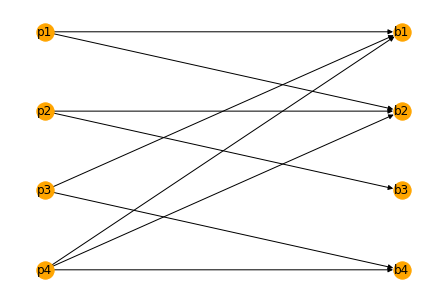

In [ ]:
# p1 → (b1, b2), p2 → (b2, b3), p3 → (b1, b4), p4 → (b1, b2, b4)

G1 = nx.DiGraph()
G1.add_edges_from([('p1','b1'),('p1','b2'),('p2','b2'),('p2','b3'),('p3','b1'),('p3','b4'),('p4','b1'),('p4','b2'),('p4','b4')])

pos = {'p1':[0,2], 'p2':[0,1], 'p3':[0,0], 'p4':[0,-1], 'b1':[1,2], 'b2':[1,1], 'b3':[1,0], 'b4':[1,-1]}
nx.draw(G1,pos,node_color='orange',with_labels=True)


### (b) Exploit max-flow problems to establish whether there exists a perfect matching that assigns to every person a book of interest.

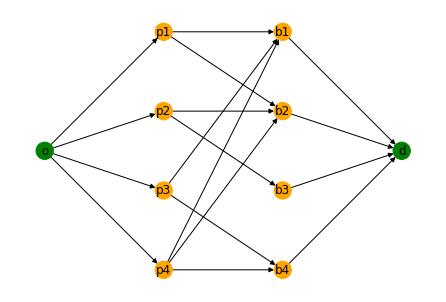

In [ ]:
'''
Add source node s and destination node d
Connect s to all nodes of the left set of nodes
Connect all nodes of right set od nodes to node d
'''

G1.add_edges_from([('o','p1'),('o','p2'),('o','p3'),('o','p4')])
G1.add_edges_from([('b1','d'),('b2','d'),('b3','d'),('b4','d')])

pos['o']=[-1, 0.5]
pos['d']=[2, 0.5]

color_map = []
for node in G1:
    if node=='o' or node=='d':
        color_map.append('green')
    else: 
        color_map.append('orange') 

nx.draw(G1,pos,node_color=color_map,with_labels=True)

In [ ]:

G1['o']['p1']['capacity'] = 1
G1['o']['p2']['capacity'] = 1
G1['o']['p3']['capacity'] = 1
G1['o']['p4']['capacity'] = 1

G1['b1']['d']['capacity'] = 1
G1['b2']['d']['capacity'] = 1
G1['b3']['d']['capacity'] = 1
G1['b4']['d']['capacity'] = 1

G1['p1']['b1']['capacity'] = 1
G1['p1']['b2']['capacity'] = 1
G1['p2']['b2']['capacity'] = 1
G1['p2']['b3']['capacity'] = 1
G1['p3']['b1']['capacity'] = 1
G1['p3']['b4']['capacity'] = 1
G1['p4']['b1']['capacity'] = 1
G1['p4']['b2']['capacity'] = 1
G1['p4']['b4']['capacity'] = 1

# If max-flow = 4 then we have perfect matching --> condition is satisfied
nx.algorithms.flow.maximum_flow(G1,'o','d') 

(4,
 {'b1': {'d': 1},
  'b2': {'d': 1},
  'b3': {'d': 1},
  'b4': {'d': 1},
  'd': {},
  'o': {'p1': 1, 'p2': 1, 'p3': 1, 'p4': 1},
  'p1': {'b1': 0, 'b2': 1},
  'p2': {'b2': 0, 'b3': 1},
  'p3': {'b1': 1, 'b4': 0},
  'p4': {'b1': 0, 'b2': 0, 'b4': 1}})

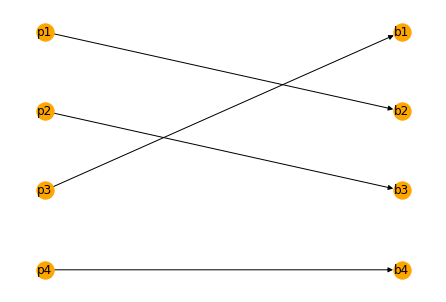

In [ ]:
# Plot perfect matching found

G2 = nx.DiGraph()
G2.add_edges_from([('p1','b2'),('p2','b3'),('p3','b1'),('p4','b4')])

pos2 = {'p1':[0,2], 'p2':[0,1], 'p3':[0,0], 'p4':[0,-1], 'b1':[1,2], 'b2':[1,1], 'b3':[1,0], 'b4':[1,-1]}
nx.draw(G2,pos2,node_color='orange',with_labels=True)

### (c) Assume now that there are multiple copies of book, specifically the distribution of the number of copies is (2, 3, 2, 2), and there is no constraint on the number of books that each person can take. The only constraint is that each person can not take more copies of the same book. Use the analogy with max-flow problems to establish how many books of interest can be assigned in total.

In [ ]:
# Each person con select at most a number of books equal to the number of books he is interested in
G1['o']['p1']['capacity'] = 2
G1['o']['p2']['capacity'] = 2
G1['o']['p3']['capacity'] = 2
G1['o']['p4']['capacity'] = 3

# Each book has only a certain amount of copies available
G1['b1']['d']['capacity'] = 2
G1['b2']['d']['capacity'] = 3
G1['b3']['d']['capacity'] = 2
G1['b4']['d']['capacity'] = 2

#Calculate maximum number of assignments possible with this structure
nx.algorithms.flow.maximum_flow(G1,'o','d')

(8,
 {'b1': {'d': 2},
  'b2': {'d': 3},
  'b3': {'d': 1},
  'b4': {'d': 2},
  'd': {},
  'o': {'p1': 1, 'p2': 2, 'p3': 2, 'p4': 3},
  'p1': {'b1': 0, 'b2': 1},
  'p2': {'b2': 1, 'b3': 1},
  'p3': {'b1': 1, 'b4': 1},
  'p4': {'b1': 1, 'b2': 1, 'b4': 1}})

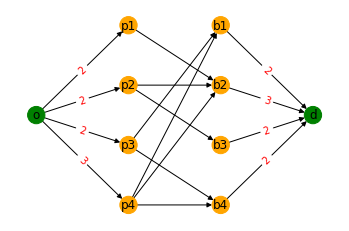

In [ ]:
# Draw assignments (remove non needed edges)
edge_labels={('o','p1'):'2',('o','p2'):'2',('o','p3'):'2',('o','p4'):'3',('b1','d'):'2',('b2','d'):'3',('b3','d'):'2',('b4','d'):'2'}
G1.remove_edge('p1', 'b1')

nx.draw_networkx_edge_labels(G1,pos,edge_labels,font_color='red')
nx.draw(G1, pos, node_color=color_map, with_labels = True)

### (d)  Starting from point (c), suppose that the library can sell a copy of a book and buy a copy of another book. Which books should be sold and bought to maximize the number of assigned books?

(9,
 {'b1': {'d': 3},
  'b2': {'d': 3},
  'b3': {'d': 1},
  'b4': {'d': 2},
  'd': {},
  'o': {'p1': 2, 'p2': 2, 'p3': 2, 'p4': 3},
  'p1': {'b1': 1, 'b2': 1},
  'p2': {'b2': 1, 'b3': 1},
  'p3': {'b1': 1, 'b4': 1},
  'p4': {'b1': 1, 'b2': 1, 'b4': 1}})

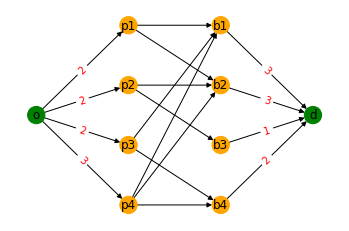

In [ ]:
# Add previously removed edge 
G1.add_edge('p1', 'b1')

# It is sufficient to buy one more copy of book b1 and sell one copy of book b3
G1['b1']['d']['capacity'] = 3
edge_labels[('b1','d')] = 3
G1['b3']['d']['capacity'] = 1
edge_labels[('b3','d')] = 1

#Verify this increments number of assignments 
nx.draw_networkx_edge_labels(G1,pos,edge_labels,font_color='red')
nx.draw(G1, pos, node_color=color_map, with_labels = True)
nx.algorithms.flow.maximum_flow(G1,'o','d')


## Exercise III

In [ ]:
# Load files
file = scipy.io.loadmat('capacities.mat')
capacities = file.get('capacities')
capacities = capacities.reshape(28,) # capacities of the links, size 28
file = scipy.io.loadmat('traveltime.mat')
traveltime = file.get('traveltime')
traveltime = traveltime.reshape(28,) # minimum travel time per edge (i.e. time when road is empty), size 28
file = scipy.io.loadmat('flow.mat')
flow = file.get('flow')
flow = flow.reshape(28,) # flow on each link, size 28
file = scipy.io.loadmat('traffic.mat')
traffic = file.get('traffic')


In [ ]:
'''
Traffic is none other than the node-link incidence matrix.
The rows represent the nodes, the columns the links (17 nodes and 28 links in total)
The i-th column has 1 in the row corresponding to the tail node of link e_i and (−1) in the row corresponding to the head node of link e_i
To be coherent with usual notation we rename the matrix 
'''
B=traffic
nodes, edges = B.shape[0], B.shape[1]

'''
Calculate length of roads (in the file traveltime.mat. values are retrieved by dividing 
the length of the highway segment with the assumed speed limit 60 miles/hour.) 
'''
length=60*traveltime 


In [ ]:
'''
In this cell we define the graph.
Specifically, we use the information given in matrix B to define the edges of G2.
We add various attributes to the edges: capacity, time (traveltime), distance (length of the link)
We also include a function to easily plot the graphs with labels for a given attribute of the ones mentioned above.
'''

G2 = nx.DiGraph()
tail, head= -1, -1

for column in range(edges):
  for row in range(nodes):
      if B[row][column]==1:
        tail=row+1
      elif B[row][column]==-1:
        head=row+1
      if tail!=-1 and head !=-1:
        G2.add_edge(tail,head,capacity=capacities[column], time=traveltime[column], distance=length[column])
        tail, head= -1, -1
        break

def plotGraph(G,attribute):
  labels = nx.get_edge_attributes(G2,attribute)
  pos = nx.spectral_layout(G) 
  plt.figure(3,figsize=(12,12)) 
  nx.draw_networkx_edge_labels(G,pos, edge_labels = labels)
  nx.draw(G, pos, node_color='orange', with_labels = True)
  plt.show


### (a) Find the shortest path between node 1 and 17. This is equivalent to the fastest path (path with shortest traveling time) in an empty network.

The Shortest path is [1, 2, 3, 9, 13, 17] with lenght 31.97976
The fastest path is [1, 2, 3, 9, 13, 17] with time 0.532996


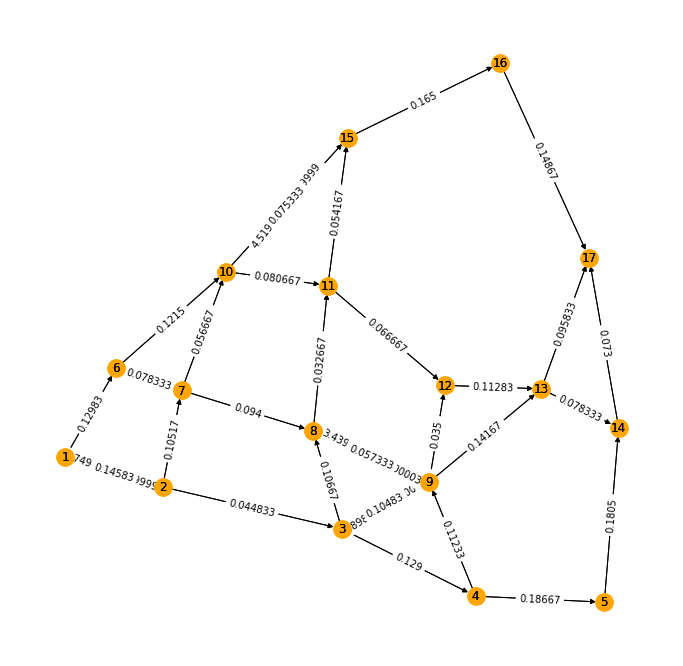

In [ ]:
# Shortest path with distance
shortest_path=nx.shortest_path(G2, source=1, target=17, weight='distance')
shortest_len=nx.shortest_path_length(G2, source=1, target=17, weight='distance')
print(f'The Shortest path is {shortest_path} with lenght {shortest_len}')
plotGraph(G2, 'distance')

#shortest path with traveltime (should obviously give the same result as above, but we double check)
shortest_path=nx.shortest_path(G2, source=1, target=17, weight='time')
shortest_len=nx.shortest_path_length(G2, source=1, target=17, weight='time')
print(f'The fastest path is {shortest_path} with time {shortest_len}')
plotGraph(G2, 'time')

### (b) Find the maximum flow between node 1 (origin) and 17 (destination)


In [ ]:
# This is simply an application of the max-flow algorithm
max_flow = nx.algorithms.flow.maximum_flow(G2, 1, 17)
print(f'The maximum flow between node 1 (origin) and 17 (destination) is {max_flow[0]}')

The maximum flow between node 1 (origin) and 17 (destination) is 22448


### (c) Given the flow vector in flow.mat, compute the external inflow ν satisfying Bf = ν. 

In [ ]:
# Compute dot product
v=B.dot(flow)
print(f'The flow vector satisfying Bf=v is {v}')

'''
In the following, we assume that the exogenous inflow is zero in all the nodes except for node 1
for which ν1 has the same value computed in the point (c), and node 17, for which ν17 = −ν1.
'''
nu = np.zeros(nodes)
nu[0], nu[-1] = v[0], -v[0]

The flow vector satisfying Bf=v is [ 16806   8570  19448   4957   -746   4768    413     -2  -5671   1169
     -5  -7131   -380  -7412  -7810  -3430 -23544]


### (d) Find the social optimum f∗ with respect to the delays on the different links de(fe). For this, minimize the cost function provided in the text (see report)

In [ ]:
'''
We define a function for solving minimisation problems.
As input it takes the expression to be minimised, the variable f whose optimal value we are 
looking for and the mode of problem we are solving (Social optimum vs Wardrop equilibrium)
'''

def minimize(f, expression, mode):

  objective = cp.Minimize(expression)
  constraints = [B @ f == nu, f >=0]
  prob = cp.Problem(objective, constraints)
  cost = prob.solve()
  flow = f.value
  
  print(f'{mode} cost: {cost.round(2)}')
  print(f'{mode} flow: {flow.round(2)}')
  return cost, flow
  


In [ ]:
# Expression was found via computations, see report for details
f=cp.Variable(edges)
expression=cp.multiply(traveltime, capacities) @ (cp.inv_pos(1-f/capacities)) - traveltime@capacities
mode='Social optimum'

c_star, flow_star = minimize(f, expression, mode)

Social optimum cost: 25943.62
Social optimum flow: [ 6642.3   6058.9   3132.4   3132.4  10163.7   4638.4   3006.36  2542.59
  3131.52   583.4      0.    2926.5      0.    3132.4   5525.3   2854.3
  4886.44  2215.44   463.78  2337.56  3318.08  5655.64  2373.04     0.
  6414.12  5505.44  4886.44  4886.44]


### e1) Find the Wardrop equilibrium f(0). For this, use the cost function provided in the text (see report)

In [ ]:
# Expression was found via computations, see report for details
f = cp.Variable(edges)
expression = -cp.multiply(traveltime,capacities)@cp.log(1-f/capacities) 
mode='Wardrop equilibrium'

c_0, flow_0 = minimize(f, expression, mode)


Wardrop equilibrium cost: 15729.61
Wardrop equilibrium flow: [ 6715.65  6715.65  2367.41  2367.41 10090.35  4645.39  2803.84  2283.56
  3418.48     0.     176.83  4171.41     0.    2367.41  5444.96  2353.17
  4933.34  1841.55   697.11  3036.49  3050.28  6086.77  2586.51     0.
  6918.74  4953.92  4933.34  4933.34]


### e2) compute the new Wardrop equilibrium with delay on link e given by de(fe)+ωe where ωe=fe*de'(fe). What do you observe?
### [ de'(fe)=(le * Ce) / (Ce - fe)^2. ]


In [ ]:
# Determine w_e
w_e = np.zeros(len(capacities))
for i in range(len(capacities)):
  w_e[i]=flow_star[i]*traveltime[i]*capacities[i]/(capacities[i]-flow_star[i])**2

# Expression was found via computations, see report for details
f = cp.Variable(edges)
expression = -cp.multiply(traveltime,capacities)@cp.log(1-f/capacities) + w_e@f 
mode='Wardrop equilibrium'

c_0_bis, flow_0_bis = minimize(f, expression, mode)


Wardrop equilibrium cost: 61885.97
Wardrop equilibrium flow: [ 6642.3   6059.07  3132.3   3132.3  10163.7   4638.01  3006.25  2542.45
  3131.54   583.23     0.    2926.77     0.    3132.3   5525.68  2854.25
  4886.43  2215.     463.8   2337.68  3318.06  5655.73  2373.17     0.
  6414.11  5505.46  4886.43  4886.43]


(f1) Instead of the total delay, let the cost be the total additional delay compared to the total
delay in free flow be given by
ce(fe) = fe(de(fe) − le)
subject to the flow constraints. Compute the system optimum f
∗
for the costs above

In [ ]:
# Compute new system optimum
f = cp.Variable(edges)
expression = cp.multiply(traveltime, capacities) @ (cp.inv_pos(1-f/capacities)) - traveltime@capacities -f@traveltime
mode = "System optimum"

c_star_bis, flow_star_bis = minimize(f, expression, mode)

System optimum cost: 15095.51
System optimum flow: [6.653260e+03 5.774660e+03 3.419750e+03 3.419740e+03 1.015274e+04
 4.642700e+03 3.105850e+03 2.662180e+03 3.009060e+03 8.786000e+02
 1.000000e-02 2.354900e+03 1.000000e-02 3.419740e+03 5.510040e+03
 3.043690e+03 4.881800e+03 2.415460e+03 4.436800e+02 2.008030e+03
 3.487370e+03 5.495400e+03 2.203780e+03 0.000000e+00 6.300680e+03
 5.623520e+03 4.881800e+03 4.881800e+03]


### (f2) Construct tolls ω∗e, e ∈ E such that the new Wardrop equilibrium with the constructed tolls f(ω∗) coincides with f∗. Compute the new Wardrop equilibrium with the constructed tolls f(ω∗) to verify your result

In [ ]:
'''
This question can be answered by recalling that if we have a graph G such that

1. Each link e be equipped with a nondecreasing differentiable delay function τe, such that every cycle in G contains a link e with
τe(0) > 0
2. the delay functions τe(fe) is convex
3. f∗ be a solution of the SO-TAP
4. Link tolls are chosen as ω∗e = f∗e τ'e(f∗e)

Then, the Wardrop equilibrium flow f(ω∗) coincides with the system optimum flow f∗

Since 1., 2., 3. are satisfied all we need to do is impose 4. to find the tolls that satisfy the requested condition.
'''
# Construct tolls as in 4.
we_star=np.zeros(len(capacities))
for i in range(len(capacities)):
  we_star[i]=(flow_star_bis[i]*traveltime[i]*capacities[i]/(capacities[i]-flow_star_bis[i])**2).round(2)
print(f'The desired tolls are {we_star}\n')

# Verify that the new Wardrop equilibrium coincides with f*

f = cp.Variable(edges)
expression = -cp.multiply(traveltime,capacities)@cp.log(1-f/capacities) + we_star@f -traveltime@f
mode = 'Wardrop equilibrium'

c_wardrop, flow_wardrop = minimize(f, expression, mode)
print(f'\nComparison:\n')
print(f'f*: {flow_star_bis}\n')
print(f'f Wardrop: {flow_wardrop.round(2)}')



The desired tolls are [1.95 0.15 0.06 0.12 1.43 0.47 0.12 0.06 0.25 0.01 0.   0.05 0.   0.15
 0.48 0.1  0.07 0.02 0.   0.01 0.07 0.24 0.06 0.   0.38 0.31 0.19 0.53]

Wardrop equilibrium cost: 50809.82
Wardrop equilibrium flow: [ 6648.81  5851.86  3474.65  3474.65 10157.19  4673.23  3116.19  2620.45
  2977.36   796.95     0.    2377.2      0.    3474.65  5483.96  2991.05
  4846.9   2353.99   495.75  2020.3   3486.8   5507.09  2181.51     0.
  6302.94  5656.16  4846.9   4846.9 ]

Comparison:

f*: [6.65326049e+03 5.77465810e+03 3.41974720e+03 3.41974127e+03
 1.01527395e+04 4.64270104e+03 3.10584825e+03 2.66217967e+03
 3.00906114e+03 8.78602390e+02 7.47261013e-03 2.35490342e+03
 5.93671883e-03 3.41974127e+03 5.51003847e+03 3.04369304e+03
 4.88180062e+03 2.41545518e+03 4.43676052e+02 2.00802789e+03
 3.48736711e+03 5.49539501e+03 2.20377719e+03 1.97379951e-03
 6.30067895e+03 5.62351846e+03 4.88180259e+03 4.88180259e+03]

f Wardrop: [ 6648.81  5851.86  3474.65  3474.65 10157.19  4673.23  3116

Instead of the total delay, let the cost be the total additional delay compared to the total delay in free flow be given by:

$c_{e}(f_{e}) = f_{e}(d_{e}(f_{e}) - l_{e})$

subject to the flow constraints. Compute the system optimum f* for the costs above. Construct tolls $w^{*}_{e}$, e 𝛜 𝜺;such that the new Wardrop equilibrium with the constructed tolls $f^{(w^{*})}$
coincides with $f^{*}$. Compute the new Wardrop equilibrium with the constructed tolls $f^{(w^{*})}$ to verify your result.